In [1]:
import pandas as pd

In [2]:
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
#       yf.pdr_override()
        df = yf.download(ticker, start=start_date, end=end_date)
# can use this as well        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year 
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()        
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 
                    'Week_Number', 'Year_Week', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='AAPL'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2018-01-01', end_date='2022-12-31', 
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)

[*********************100%%**********************]  1 of 1 completed
read  1259  lines of data for ticker:  AAPL
wrote 1259 lines to file: C:\Users\18249\Assignment\AAPL.csv


In [3]:
AAPL_df=pd.read_csv("AAPL.csv")

In [4]:
AAPL_df.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2018-01-02,2018,1,2,Tuesday,0,2018-00,42.54,43.08,42.31,43.06,102223600,40.78,0.000000,40.780000,40.780000
1,2018-01-03,2018,1,3,Wednesday,0,2018-00,43.13,43.64,42.99,43.06,118071600,40.77,-0.000174,40.775000,40.775000
2,2018-01-04,2018,1,4,Thursday,0,2018-00,43.13,43.37,43.02,43.26,89738400,40.96,0.004645,40.836667,40.836667
3,2018-01-05,2018,1,5,Friday,0,2018-00,43.36,43.84,43.26,43.75,94640000,41.43,0.011385,40.985000,40.985000
4,2018-01-08,2018,1,8,Monday,1,2018-01,43.59,43.90,43.48,43.59,82271200,41.27,-0.003714,41.042000,41.042000


In [5]:
SPY_df=pd.read_csv("SPY2018.csv")

In [6]:
SPY_df.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2018-01-02,2018,1,2,Tuesday,0,2018-00,267.84,268.81,267.40,268.77,86655700,244.06,0.000000,244.060000,244.060000
1,2018-01-03,2018,1,3,Wednesday,0,2018-00,268.96,270.64,268.96,270.47,90070400,245.60,0.006325,244.830000,244.830000
2,2018-01-04,2018,1,4,Thursday,0,2018-00,271.20,272.16,270.54,271.61,80636400,246.64,0.004215,245.433333,245.433333
3,2018-01-05,2018,1,5,Friday,0,2018-00,272.51,273.56,271.95,273.42,83524000,248.28,0.006664,246.145000,246.145000
4,2018-01-08,2018,1,8,Monday,1,2018-01,273.31,274.10,272.98,273.92,57319200,248.73,0.001829,246.662000,246.662000


In [7]:
AAPL_df['True Label'] = 0
for index, row in AAPL_df.iterrows():
    if row['Return'] > 0:
        AAPL_df.at[index, 'True Label'] = '+'
    if row['Return'] <0:
        AAPL_df.at[index, 'True Label'] = '-'
AAPL_df.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label
0,2018-01-02,2018,1,2,Tuesday,0,2018-00,42.54,43.08,42.31,43.06,102223600,40.78,0.000000,40.780000,40.780000,0
1,2018-01-03,2018,1,3,Wednesday,0,2018-00,43.13,43.64,42.99,43.06,118071600,40.77,-0.000174,40.775000,40.775000,-
2,2018-01-04,2018,1,4,Thursday,0,2018-00,43.13,43.37,43.02,43.26,89738400,40.96,0.004645,40.836667,40.836667,+
3,2018-01-05,2018,1,5,Friday,0,2018-00,43.36,43.84,43.26,43.75,94640000,41.43,0.011385,40.985000,40.985000,+
4,2018-01-08,2018,1,8,Monday,1,2018-01,43.59,43.90,43.48,43.59,82271200,41.27,-0.003714,41.042000,41.042000,-


In [8]:
SPY_df['True Label'] = 0
for index, row in SPY_df.iterrows():
    if row['Return'] > 0:
        SPY_df.at[index, 'True Label'] = '+'
    if row['Return'] <0:
        SPY_df.at[index, 'True Label'] = '-'
SPY_df.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label
0,2018-01-02,2018,1,2,Tuesday,0,2018-00,267.84,268.81,267.40,268.77,86655700,244.06,0.000000,244.060000,244.060000,0
1,2018-01-03,2018,1,3,Wednesday,0,2018-00,268.96,270.64,268.96,270.47,90070400,245.60,0.006325,244.830000,244.830000,+
2,2018-01-04,2018,1,4,Thursday,0,2018-00,271.20,272.16,270.54,271.61,80636400,246.64,0.004215,245.433333,245.433333,+
3,2018-01-05,2018,1,5,Friday,0,2018-00,272.51,273.56,271.95,273.42,83524000,248.28,0.006664,246.145000,246.145000,+
4,2018-01-08,2018,1,8,Monday,1,2018-01,273.31,274.10,272.98,273.92,57319200,248.73,0.001829,246.662000,246.662000,+


In [9]:
AAPL_df_train = AAPL_df[(AAPL_df['Date'] >= '2018-01-01') & (AAPL_df['Date'] <= '2020-12-31')]

In [10]:
AAPL_df_train.shape

(756, 17)

In [11]:
count=0
for index, row in AAPL_df_train.iterrows():
    if row['True Label']=="+":
        count= count+1
count

412

In [12]:
probability_nex_day_up_AAPL= 412/750
probability_nex_day_up_AAPL

0.5493333333333333

In [13]:
SPY_df_train = SPY_df[(SPY_df['Date'] >= '2018-01-01') & (SPY_df['Date'] <= '2020-12-31')]

In [14]:
count=0
for index, row in SPY_df_train.iterrows():
    if row['True Label']=="+":
        count= count+1
count

428

In [15]:
probability_nex_day_up_SPY= 428/750
probability_nex_day_up_SPY

0.5706666666666667

In [16]:
count = 0

for i in range(len(AAPL_df_train) - 1):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]

    if current_label == "-" and next_label == "+":
        count += 1

count


195

In [17]:
count = 0

for i in range(len(AAPL_df_train) - 1):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]

    if current_label == "-" and next_label == "-":
        count += 1

count

145

In [18]:
probability_k_1=195/(195+145)
probability_k_1

0.5735294117647058

In [19]:
count = 0

for i in range(len(AAPL_df_train) - 2):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]
    next_next_label = AAPL_df_train['True Label'].iloc[i + 2]

    if current_label == "-" and next_label == "-" and next_next_label=="+":
        count += 1

count

90

In [20]:
count = 0

for i in range(len(AAPL_df_train) - 2):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]
    next_next_label = AAPL_df_train['True Label'].iloc[i + 2]

    if current_label == "-" and next_label == "-" and next_next_label=="-":
        count += 1

count

54

In [21]:
probability_k_2=90/(90+54)
probability_k_2

0.625

In [22]:
count = 0

for i in range(len(AAPL_df_train) - 3):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]
    next_next_label = AAPL_df_train['True Label'].iloc[i + 2]
    next_next_next_label = AAPL_df_train['True Label'].iloc[i + 3]

    if current_label == "-" and next_label == "-" and next_next_label=="-" and  next_next_next_label=="+":
        count += 1

count

38

In [23]:
count = 0

for i in range(len(AAPL_df_train) - 3):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]
    next_next_label = AAPL_df_train['True Label'].iloc[i + 2]
    next_next_next_label = AAPL_df_train['True Label'].iloc[i + 3]

    if current_label == "-" and next_label == "-" and next_next_label=="-" and  next_next_next_label=="-":
        count += 1

count

15

In [24]:
probability_k_3=38/(38+15)
probability_k_3

0.7169811320754716

In [25]:
count = 0

for i in range(len(SPY_df_train) - 1):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]

    if current_label == "-" and next_label == "+":
        count += 1

count

187

In [26]:
count = 0

for i in range(len(SPY_df_train) - 1):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]

    if current_label == "-" and next_label == "-":
        count += 1

count

137

In [27]:
SPY_probability_k_1=187/(187+137)
SPY_probability_k_1

0.5771604938271605

In [28]:
count = 0

for i in range(len(SPY_df_train) - 2):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]
    next_next_label = SPY_df_train['True Label'].iloc[i + 2]

    if current_label == "-" and next_label == "-" and next_next_label=="+":
        count += 1

count

73

In [29]:
count = 0

for i in range(len(SPY_df_train) - 2):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]
    next_next_label = SPY_df_train['True Label'].iloc[i + 2]

    if current_label == "-" and next_label == "-" and next_next_label=="-":
        count += 1

count

63

In [30]:
SPY_probability_k_2=73/(73+63)
SPY_probability_k_2

0.5367647058823529

In [31]:
count = 0

for i in range(len(SPY_df_train) - 3):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]
    next_next_label = SPY_df_train['True Label'].iloc[i + 2]
    next_next_next_label = SPY_df_train['True Label'].iloc[i + 3]

    if current_label == "-" and next_label == "-" and next_next_label=="-" and  next_next_next_label=="+":
        count += 1

count

33

In [32]:
count = 0

for i in range(len(SPY_df_train) - 3):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]
    next_next_label = SPY_df_train['True Label'].iloc[i + 2]
    next_next_next_label = SPY_df_train['True Label'].iloc[i + 3]

    if current_label == "-" and next_label == "-" and next_next_label=="-" and  next_next_next_label=="-":
        count += 1

count

30

In [33]:
SPY_probability_k_3=33/(33+30)
SPY_probability_k_3

0.5238095238095238

In [34]:
count = 0

for i in range(len(AAPL_df_train) - 1):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]

    if current_label == "+" and next_label == "+":
        count += 1

count

216

In [35]:
count = 0

for i in range(len(AAPL_df_train) - 1):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]

    if current_label == "+" and next_label == "-":
        count += 1

count

196

In [36]:
probability_k_1_still=216/(216+196)
probability_k_1_still

0.5242718446601942

In [37]:
count = 0

for i in range(len(AAPL_df_train) - 2):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]
    next_next_label = AAPL_df_train['True Label'].iloc[i + 2]

    if current_label == "+" and next_label == "+" and next_next_label=="+":
        count += 1

count

117

In [38]:
count = 0

for i in range(len(AAPL_df_train) - 2):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]
    next_next_label = AAPL_df_train['True Label'].iloc[i + 2]

    if current_label == "+" and next_label == "+" and next_next_label=="-":
        count += 1

count

99

In [39]:
probability_k_2_still=117/(117+99)
probability_k_2_still

0.5416666666666666

In [40]:
count = 0

for i in range(len(AAPL_df_train) - 3):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]
    next_next_label = AAPL_df_train['True Label'].iloc[i + 2]
    next_next_next_label = AAPL_df_train['True Label'].iloc[i + 3]

    if current_label == "+" and next_label == "+" and next_next_label=="+" and  next_next_next_label=="+":
        count += 1

count

64

In [41]:
count = 0

for i in range(len(AAPL_df_train) - 3):
    current_label = AAPL_df_train['True Label'].iloc[i]
    next_label = AAPL_df_train['True Label'].iloc[i + 1]
    next_next_label = AAPL_df_train['True Label'].iloc[i + 2]
    next_next_next_label = AAPL_df_train['True Label'].iloc[i + 3]

    if current_label == "+" and next_label == "+" and next_next_label=="+" and  next_next_next_label=="-":
        count += 1

count

53

In [42]:
probability_k_3_still=64/(64+53)
probability_k_3_still

0.5470085470085471

In [43]:
count = 0

for i in range(len(SPY_df_train) - 1):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]

    if current_label == "+" and next_label == "+":
        count += 1

count

239

In [44]:
count = 0

for i in range(len(SPY_df_train) - 1):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]

    if current_label == "+" and next_label == "-":
        count += 1

count

187

In [45]:
SPY_probability_k_1_still=239/(239+187)
SPY_probability_k_1_still

0.5610328638497653

In [46]:
count = 0

for i in range(len(SPY_df_train) - 2):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]
    next_next_label = SPY_df_train['True Label'].iloc[i + 2]

    if current_label == "+" and next_label == "+" and next_next_label=="+":
        count += 1

count

133

In [47]:
count = 0

for i in range(len(SPY_df_train) - 2):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]
    next_next_label = SPY_df_train['True Label'].iloc[i + 2]

    if current_label == "+" and next_label == "+" and next_next_label=="-":
        count += 1

count

104

In [48]:
SPY_probability_k_2_still=133/(133+104)
SPY_probability_k_2_still

0.5611814345991561

In [49]:
count = 0

for i in range(len(SPY_df_train) - 3):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]
    next_next_label = SPY_df_train['True Label'].iloc[i + 2]
    next_next_next_label = SPY_df_train['True Label'].iloc[i + 3]

    if current_label == "+" and next_label == "+" and next_next_label=="+" and  next_next_next_label=="+":
        count += 1

count

61

In [50]:
count = 0

for i in range(len(SPY_df_train) - 3):
    current_label = SPY_df_train['True Label'].iloc[i]
    next_label = SPY_df_train['True Label'].iloc[i + 1]
    next_next_label = SPY_df_train['True Label'].iloc[i + 2]
    next_next_next_label = SPY_df_train['True Label'].iloc[i + 3]

    if current_label == "+" and next_label == "+" and next_next_label=="+" and  next_next_next_label=="-":
        count += 1

count

72

In [51]:
SPY_probability_k_3_still=61/(61+72)
SPY_probability_k_3_still

0.45864661654135336

In [52]:
AAPL_df_prediction=AAPL_df
AAPL_df_prediction.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label
0,2018-01-02,2018,1,2,Tuesday,0,2018-00,42.54,43.08,42.31,43.06,102223600,40.78,0.000000,40.780000,40.780000,0
1,2018-01-03,2018,1,3,Wednesday,0,2018-00,43.13,43.64,42.99,43.06,118071600,40.77,-0.000174,40.775000,40.775000,-
2,2018-01-04,2018,1,4,Thursday,0,2018-00,43.13,43.37,43.02,43.26,89738400,40.96,0.004645,40.836667,40.836667,+
3,2018-01-05,2018,1,5,Friday,0,2018-00,43.36,43.84,43.26,43.75,94640000,41.43,0.011385,40.985000,40.985000,+
4,2018-01-08,2018,1,8,Monday,1,2018-01,43.59,43.90,43.48,43.59,82271200,41.27,-0.003714,41.042000,41.042000,-


In [53]:
Ws = [2, 3, 4]

for W in Ws:
    predicted_labels = []
    true_labels = AAPL_df_prediction['True Label'].tolist()
    for i in range(W, len(AAPL_df_prediction)):
        s1=[]
        s2=[]
        s = AAPL_df_prediction['True Label'].iloc[i - W : i].tolist()
        s1.extend(s)
        s1.append('+')
        s2.extend(s)
        s2.append('-')
        N_plus = sum(1 for x in range(len(true_labels) - len(s1) + 1) if true_labels[x:x+len(s1)] == s1)
        N_minus = sum(1 for x in range(len(true_labels) - len(s2) + 1) if true_labels[x:x+len(s2)] == s2)   
        if N_plus >= N_minus:
            predicted_labels.append('+')
        else:
            predicted_labels.append('-')
           
    AAPL_df_prediction[f'Predicted Label W={W}'] = [None]*W + predicted_labels

In [54]:
AAPL_df_prediction.head(10)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4
0,2018-01-02,2018,1,2,Tuesday,0,2018-00,42.54,43.08,42.31,43.06,102223600,40.78,0.000000,40.780000,40.780000,0,None,None,None
1,2018-01-03,2018,1,3,Wednesday,0,2018-00,43.13,43.64,42.99,43.06,118071600,40.77,-0.000174,40.775000,40.775000,-,None,None,None
2,2018-01-04,2018,1,4,Thursday,0,2018-00,43.13,43.37,43.02,43.26,89738400,40.96,0.004645,40.836667,40.836667,+,+,None,None
3,2018-01-05,2018,1,5,Friday,0,2018-00,43.36,43.84,43.26,43.75,94640000,41.43,0.011385,40.985000,40.985000,+,+,+,None
4,2018-01-08,2018,1,8,Monday,1,2018-01,43.59,43.90,43.48,43.59,82271200,41.27,-0.003714,41.042000,41.042000,-,+,-,-
5,2018-01-09,2018,1,9,Tuesday,1,2018-01,43.64,43.76,43.35,43.58,86336000,41.27,-0.000115,41.080000,41.080000,-,+,-,+
6,2018-01-10,2018,1,10,Wednesday,1,2018-01,43.29,43.58,43.25,43.57,95839600,41.26,-0.000230,41.105714,41.105714,-,+,-,-
7,2018-01-11,2018,1,11,Thursday,1,2018-01,43.65,43.87,43.62,43.82,74670800,41.49,0.005680,41.153750,41.153750,+,+,+,+
8,2018-01-12,2018,1,12,Friday,1,2018-01,44.04,44.34,43.91,44.27,101672400,41.92,0.010326,41.238889,41.238889,+,+,+,+
9,2018-01-16,2018,1,16,Tuesday,2,2018-02,44.47,44.85,44.03,44.05,118263600,41.71,-0.005082,41.286000,41.286000,-,+,-,+


In [55]:
SPY_df_prediction=SPY_df
SPY_df_prediction.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label
0,2018-01-02,2018,1,2,Tuesday,0,2018-00,267.84,268.81,267.40,268.77,86655700,244.06,0.000000,244.060000,244.060000,0
1,2018-01-03,2018,1,3,Wednesday,0,2018-00,268.96,270.64,268.96,270.47,90070400,245.60,0.006325,244.830000,244.830000,+
2,2018-01-04,2018,1,4,Thursday,0,2018-00,271.20,272.16,270.54,271.61,80636400,246.64,0.004215,245.433333,245.433333,+
3,2018-01-05,2018,1,5,Friday,0,2018-00,272.51,273.56,271.95,273.42,83524000,248.28,0.006664,246.145000,246.145000,+
4,2018-01-08,2018,1,8,Monday,1,2018-01,273.31,274.10,272.98,273.92,57319200,248.73,0.001829,246.662000,246.662000,+


In [56]:
Ws = [2, 3, 4]

for W in Ws:
    predicted_labels = []
    true_labels = SPY_df_prediction['True Label'].tolist()
    for i in range(W, len(SPY_df_prediction)):
        s1=[]
        s2=[]
        s = SPY_df_prediction['True Label'].iloc[i - W : i].tolist()
        s1.extend(s)
        s1.append('+')
        s2.extend(s)
        s2.append('-')
        N_plus = sum(1 for x in range(len(true_labels) - len(s1) + 1) if true_labels[x:x+len(s1)] == s1)
        N_minus = sum(1 for x in range(len(true_labels) - len(s2) + 1) if true_labels[x:x+len(s2)] == s2)   
        if N_plus >= N_minus:
            predicted_labels.append('+')
        else:
            predicted_labels.append('-')
           
    SPY_df_prediction[f'Predicted Label W={W}'] = [None]*W + predicted_labels

In [57]:
SPY_df_prediction.tail(20)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4
1239,2022-12-02,2022,12,2,Friday,48,2022-48,402.25,407.86,402.14,406.91,85342700,400.60,-0.001154,393.213571,374.4370,-,+,+,+
1240,2022-12-05,2022,12,5,Monday,49,2022-49,403.95,404.93,398.17,399.59,77289800,393.40,-0.017989,393.527857,375.0600,-,+,+,+
1241,2022-12-06,2022,12,6,Tuesday,49,2022-49,399.42,399.99,391.64,393.83,77972200,387.73,-0.014415,393.200714,375.6414,-,+,+,-
1242,2022-12-07,2022,12,7,Wednesday,49,2022-49,392.94,395.64,391.97,393.16,65927900,387.07,-0.001701,393.040000,376.2278,-,+,+,+
1243,2022-12-08,2022,12,8,Thursday,49,2022-49,395.14,397.36,393.27,396.24,60737900,390.10,0.007834,393.180714,376.7340,+,+,+,+
1244,2022-12-09,2022,12,9,Friday,49,2022-49,394.94,397.62,393.15,393.28,81447700,387.18,-0.007470,392.987143,377.3342,-,+,-,-
1245,2022-12-12,2022,12,12,Monday,50,2022-50,394.11,398.95,393.41,398.95,75405800,392.77,0.014417,393.294286,378.1568,+,+,+,+
1246,2022-12-13,2022,12,13,Tuesday,50,2022-50,410.22,410.49,399.07,401.97,123782500,395.74,0.007570,393.440000,378.8530,+,+,+,+
1247,2022-12-14,2022,12,14,Wednesday,50,2022-50,401.61,405.50,396.31,399.40,108111300,393.21,-0.006394,393.227857,379.2750,-,+,+,+
1248,2022-12-15,2022,12,15,Thursday,50,2022-50,394.30,395.25,387.89,389.63,117705900,383.59,-0.024462,392.335000,379.5218,-,+,+,-


In [58]:
AAPL_df_testing = AAPL_df_prediction[(AAPL_df_prediction['Date'] >= '2021-01-01') & (AAPL_df_prediction['Date'] <= '2022-12-31')]
AAPL_df_testing.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4
756,2021-01-04,2021,1,4,Monday,1,2021-01,133.52,133.61,126.76,129.41,143301900,127.33,-0.024719,128.140000,119.2924,-,+,+,+
757,2021-01-05,2021,1,5,Tuesday,1,2021-01,128.89,131.74,128.43,131.01,97664900,128.91,0.012364,128.789286,119.5968,+,+,+,+
758,2021-01-06,2021,1,6,Wednesday,1,2021-01,127.72,131.05,126.38,126.60,155088000,124.57,-0.033662,128.699286,119.8282,-,+,+,+
759,2021-01-07,2021,1,7,Thursday,1,2021-01,128.36,131.63,127.86,130.92,109578200,128.82,0.034123,128.917857,120.1444,+,+,+,+
760,2021-01-08,2021,1,8,Friday,1,2021-01,132.43,132.63,130.23,132.05,105158200,129.93,0.008631,129.153571,120.4524,+,+,+,-


In [59]:
count=0
for index, row in AAPL_df_testing.iterrows():
    if row['Predicted Label W=2']==row['True Label']:
        count+=1
count

253

In [60]:
probability_w_2_AAPL= 253/len(AAPL_df_testing)
probability_w_2_AAPL

0.5029821073558648

In [61]:
count=0
for index, row in AAPL_df_testing.iterrows():
    if row['Predicted Label W=3']==row['True Label']:
        count+=1
count

279

In [62]:
probability_w_3_AAPL= 279/len(AAPL_df_testing)
probability_w_3_AAPL

0.5546719681908548

In [63]:
count=0
for index, row in AAPL_df_testing.iterrows():
    if row['Predicted Label W=4']==row['True Label']:
        count+=1
count

272

In [64]:
probability_w_4_AAPL= 272/len(AAPL_df_testing)
probability_w_4_AAPL

0.5407554671968191

In [65]:
SPY_df_testing = SPY_df_prediction[(SPY_df_prediction['Date'] >= '2021-01-01') & (SPY_df_prediction['Date'] <= '2022-12-31')]
SPY_df_testing.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4
756,2021-01-04,2021,1,4,Monday,1,2021-01,375.31,375.45,364.82,368.79,110210800,354.20,-0.013614,354.640714,343.1330,-,+,+,+
757,2021-01-05,2021,1,5,Tuesday,1,2021-01,368.10,372.50,368.05,371.33,66426200,356.64,0.006887,355.205000,343.6744,+,+,+,-
758,2021-01-06,2021,1,6,Wednesday,1,2021-01,369.71,376.98,369.12,373.55,107997700,358.77,0.005979,355.584286,344.2360,+,+,+,-
759,2021-01-07,2021,1,7,Thursday,1,2021-01,376.10,379.90,375.91,379.10,68766800,364.10,0.014857,356.305000,345.0264,+,+,+,+
760,2021-01-08,2021,1,8,Friday,1,2021-01,380.59,381.49,377.10,381.26,71677200,366.17,0.005698,357.032143,345.8806,+,+,-,-


In [66]:
count=0
for index, row in SPY_df_testing.iterrows():
    if row['Predicted Label W=2']==row['True Label']:
        count+=1
count

255

In [67]:
probability_w_2_SPY= 255/len(SPY_df_testing)
probability_w_2_SPY

0.5069582504970179

In [68]:
count=0
for index, row in SPY_df_testing.iterrows():
    if row['Predicted Label W=3']==row['True Label']:
        count+=1
count

260

In [69]:
probability_w_3_SPY= 260/len(SPY_df_testing)
probability_w_3_SPY

0.5168986083499006

In [70]:
count=0
for index, row in SPY_df_testing.iterrows():
    if row['Predicted Label W=4']==row['True Label']:
        count+=1
count

270

In [71]:
probability_w_4_SPY= 270/len(SPY_df_testing)
probability_w_4_SPY

0.536779324055666

In [72]:
AAPL_df_ensemble=AAPL_df_testing.copy()
AAPL_df_ensemble.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4
756,2021-01-04,2021,1,4,Monday,1,2021-01,133.52,133.61,126.76,129.41,143301900,127.33,-0.024719,128.140000,119.2924,-,+,+,+
757,2021-01-05,2021,1,5,Tuesday,1,2021-01,128.89,131.74,128.43,131.01,97664900,128.91,0.012364,128.789286,119.5968,+,+,+,+
758,2021-01-06,2021,1,6,Wednesday,1,2021-01,127.72,131.05,126.38,126.60,155088000,124.57,-0.033662,128.699286,119.8282,-,+,+,+
759,2021-01-07,2021,1,7,Thursday,1,2021-01,128.36,131.63,127.86,130.92,109578200,128.82,0.034123,128.917857,120.1444,+,+,+,+
760,2021-01-08,2021,1,8,Friday,1,2021-01,132.43,132.63,130.23,132.05,105158200,129.93,0.008631,129.153571,120.4524,+,+,+,-


In [73]:
def compute_ensemble_label(row):
    labels = [row['Predicted Label W=2'], row['Predicted Label W=3'], row['Predicted Label W=4']]

    return max(set(labels), key=labels.count)

AAPL_df_ensemble['Ensemble Label'] = AAPL_df_ensemble.apply(compute_ensemble_label, axis=1)
AAPL_df_ensemble.head(10)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,...,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4,Ensemble Label
756,2021-01-04,2021,1,4,Monday,1,2021-01,133.52,133.61,126.76,...,143301900,127.33,-0.024719,128.140000,119.2924,-,+,+,+,+
757,2021-01-05,2021,1,5,Tuesday,1,2021-01,128.89,131.74,128.43,...,97664900,128.91,0.012364,128.789286,119.5968,+,+,+,+,+
758,2021-01-06,2021,1,6,Wednesday,1,2021-01,127.72,131.05,126.38,...,155088000,124.57,-0.033662,128.699286,119.8282,-,+,+,+,+
759,2021-01-07,2021,1,7,Thursday,1,2021-01,128.36,131.63,127.86,...,109578200,128.82,0.034123,128.917857,120.1444,+,+,+,+,+
760,2021-01-08,2021,1,8,Friday,1,2021-01,132.43,132.63,130.23,...,105158200,129.93,0.008631,129.153571,120.4524,+,+,+,-,+
761,2021-01-11,2021,1,11,Monday,2,2021-02,129.19,130.17,128.50,...,100384500,126.91,-0.023249,129.316429,120.8060,-,+,-,-,-
762,2021-01-12,2021,1,12,Tuesday,2,2021-02,128.50,129.69,126.86,...,91951100,126.73,-0.001395,129.356429,121.0752,-,+,-,+,+
763,2021-01-13,2021,1,13,Wednesday,2,2021-02,128.76,131.45,128.49,...,88636800,128.79,0.016227,129.287143,121.5124,+,+,-,-,-
764,2021-01-14,2021,1,14,Thursday,2,2021-02,130.80,131.00,128.76,...,90221800,126.84,-0.015127,129.142857,121.9124,-,+,+,+,+
765,2021-01-15,2021,1,15,Friday,2,2021-02,128.78,130.22,127.00,...,111598500,125.10,-0.013731,128.803571,122.2448,-,+,+,+,+


In [74]:
SPY_df_ensemble=SPY_df_testing.copy()
SPY_df_ensemble.tail(15)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4
1244,2022-12-09,2022,12,9,Friday,49,2022-49,394.94,397.62,393.15,393.28,81447700,387.18,-0.007470,392.987143,377.3342,-,+,-,-
1245,2022-12-12,2022,12,12,Monday,50,2022-50,394.11,398.95,393.41,398.95,75405800,392.77,0.014417,393.294286,378.1568,+,+,+,+
1246,2022-12-13,2022,12,13,Tuesday,50,2022-50,410.22,410.49,399.07,401.97,123782500,395.74,0.007570,393.440000,378.8530,+,+,+,+
1247,2022-12-14,2022,12,14,Wednesday,50,2022-50,401.61,405.50,396.31,399.40,108111300,393.21,-0.006394,393.227857,379.2750,-,+,+,+
1248,2022-12-15,2022,12,15,Thursday,50,2022-50,394.30,395.25,387.89,389.63,117705900,383.59,-0.024462,392.335000,379.5218,-,+,+,-
1249,2022-12-16,2022,12,16,Friday,50,2022-50,385.18,386.58,381.04,383.27,119858000,379.06,-0.011806,391.570000,379.7546,-,+,+,+
1250,2022-12-19,2022,12,19,Monday,51,2022-51,383.47,383.82,378.28,380.02,79878100,375.85,-0.008480,390.623571,380.1282,-,+,+,-
1251,2022-12-20,2022,12,20,Tuesday,51,2022-51,379.23,382.23,377.85,380.54,74427200,376.36,0.001368,388.837857,380.5666,+,+,+,+
1252,2022-12-21,2022,12,21,Wednesday,51,2022-51,383.25,387.41,382.69,386.23,78167400,381.99,0.014953,387.475000,381.1624,+,+,-,-
1253,2022-12-22,2022,12,22,Thursday,51,2022-51,383.05,386.21,374.77,380.72,100120900,376.54,-0.014266,385.756429,381.6726,-,+,+,+


In [75]:
SPY_df_ensemble['Ensemble Label'] = SPY_df_ensemble.apply(compute_ensemble_label, axis=1)
SPY_df_ensemble.head(10)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,...,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4,Ensemble Label
756,2021-01-04,2021,1,4,Monday,1,2021-01,375.31,375.45,364.82,...,110210800,354.20,-0.013614,354.640714,343.1330,-,+,+,+,+
757,2021-01-05,2021,1,5,Tuesday,1,2021-01,368.10,372.50,368.05,...,66426200,356.64,0.006887,355.205000,343.6744,+,+,+,-,+
758,2021-01-06,2021,1,6,Wednesday,1,2021-01,369.71,376.98,369.12,...,107997700,358.77,0.005979,355.584286,344.2360,+,+,+,-,+
759,2021-01-07,2021,1,7,Thursday,1,2021-01,376.10,379.90,375.91,...,68766800,364.10,0.014857,356.305000,345.0264,+,+,+,+,+
760,2021-01-08,2021,1,8,Friday,1,2021-01,380.59,381.49,377.10,...,71677200,366.17,0.005698,357.032143,345.8806,+,+,-,-,-
761,2021-01-11,2021,1,11,Monday,2,2021-02,377.85,380.58,377.72,...,51034700,363.71,-0.006741,357.685000,346.9068,-,+,-,-,-
762,2021-01-12,2021,1,12,Tuesday,2,2021-02,378.89,379.86,376.36,...,52547700,363.78,0.000211,358.433571,347.8708,+,+,+,+,+
763,2021-01-13,2021,1,13,Wednesday,2,2021-02,378.69,380.86,377.85,...,45303600,364.76,0.002693,359.294286,348.9202,+,+,+,-,+
764,2021-01-14,2021,1,14,Thursday,2,2021-02,380.59,381.13,378.10,...,49989100,363.48,-0.003502,360.040714,349.8740,-,+,+,+,+
765,2021-01-15,2021,1,15,Friday,2,2021-02,376.72,377.58,373.70,...,107160000,360.83,-0.007293,360.500000,350.6634,-,+,+,-,+


In [76]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Ensemble Label']==row['True Label']:
        count+=1
count

272

In [77]:
probability_ensemble_AAPL= 272/len(AAPL_df_ensemble)
probability_ensemble_AAPL

0.5407554671968191

In [78]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Ensemble Label']==row['True Label']:
        count+=1
count

259

In [79]:
probability_ensemble_SPY= 259/len(SPY_df_ensemble)
probability_ensemble_SPY

0.5149105367793241

In [80]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Ensemble Label']==row['True Label']=='-':
        count+=1
count

55

In [81]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Predicted Label W=2']==row['True Label']=='-':
        count+=1
count

1

In [82]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Predicted Label W=3']==row['True Label']=='-':
        count+=1
count

108

In [83]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Predicted Label W=4']==row['True Label']=='-':
        count+=1
count

84

In [84]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Ensemble Label']==row['True Label']=='-':
        count+=1
count

66

In [85]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Predicted Label W=2']==row['True Label']=='-':
        count+=1
count

0

In [86]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Predicted Label W=3']==row['True Label']=='-':
        count+=1
count

67

In [87]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Predicted Label W=4']==row['True Label']=='-':
        count+=1
count

120

In [88]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Ensemble Label']==row['True Label']=='+':
        count+=1
count

217

In [89]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Predicted Label W=2']==row['True Label']=='+':
        count+=1
count

252

In [90]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Predicted Label W=3']==row['True Label']=='+':
        count+=1
count

171

In [91]:
count=0
for index, row in AAPL_df_ensemble.iterrows():
    if row['Predicted Label W=4']==row['True Label']=='+':
        count+=1
count

188

In [92]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Ensemble Label']==row['True Label']=='+':
        count+=1
count

193

In [93]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Predicted Label W=2']==row['True Label']=='+':
        count+=1
count

255

In [94]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Predicted Label W=3']==row['True Label']=='+':
        count+=1
count

193

In [95]:
count=0
for index, row in SPY_df_ensemble.iterrows():
    if row['Predicted Label W=4']==row['True Label']=='+':
        count+=1
count

150

In [96]:
L=len(SPY_df_ensemble)
L

503

In [97]:
summarize = {
    'W': [2, 3, 4, 'ensemble', 2, 3, 4, 'ensemble'],
    'ticker': ['S&P-500', 'S&P-500', 'S&P-500', 'S&P-500', 'AAPL', 'AAPL', 'AAPL', 'AAPL'],
    'TP': [255, 193, 150, 193, 252, 171, 188, 217],
    'TN': [0, 67, 120, 66, 1, 108, 84, 55]
}

In [98]:
summarize_df = pd.DataFrame(summarize)

In [99]:
summarize_df['FP']= 503-summarize_df['TP']

In [100]:
summarize_df['FN']= 503-summarize_df['TN']

In [101]:
summarize_df['accuracy']= (summarize_df['TP']+summarize_df['TN'])/503

In [102]:
summarize_df['TPR']=summarize_df['TP']/(summarize_df['TP']+summarize_df['FN'])

In [103]:
summarize_df['TNR']=summarize_df['TN']/(summarize_df['TN']+summarize_df['FP'])

In [104]:
summarize_df = summarize_df[['W', 'ticker', 'TP', 'FP', 'TN', 'FN', 'accuracy', 'TPR', 'TNR']]

In [105]:
summarize_df

,W,ticker,TP,FP,TN,FN,accuracy,TPR,TNR
0,2,S&P-500,255,248,0,503,0.506958,0.336412,0.000000
1,3,S&P-500,193,310,67,436,0.516899,0.306836,0.177719
2,4,S&P-500,150,353,120,383,0.536779,0.281426,0.253700
3,ensemble,S&P-500,193,310,66,437,0.514911,0.306349,0.175532
4,2,AAPL,252,251,1,502,0.502982,0.334218,0.003968
5,3,AAPL,171,332,108,395,0.554672,0.302120,0.245455
6,4,AAPL,188,315,84,419,0.540755,0.309720,0.210526
7,ensemble,AAPL,217,286,55,448,0.540755,0.326316,0.161290


In [106]:
pd.set_option('display.max_columns', None)


AAPL_df_ensemble.head(30)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,Predicted Label W=2,Predicted Label W=3,Predicted Label W=4,Ensemble Label
756,2021-01-04,2021,1,4,Monday,1,2021-01,133.52,133.61,126.76,129.41,143301900,127.33,-0.024719,128.140000,119.2924,-,+,+,+,+
757,2021-01-05,2021,1,5,Tuesday,1,2021-01,128.89,131.74,128.43,131.01,97664900,128.91,0.012364,128.789286,119.5968,+,+,+,+,+
758,2021-01-06,2021,1,6,Wednesday,1,2021-01,127.72,131.05,126.38,126.60,155088000,124.57,-0.033662,128.699286,119.8282,-,+,+,+,+
759,2021-01-07,2021,1,7,Thursday,1,2021-01,128.36,131.63,127.86,130.92,109578200,128.82,0.034123,128.917857,120.1444,+,+,+,+,+
760,2021-01-08,2021,1,8,Friday,1,2021-01,132.43,132.63,130.23,132.05,105158200,129.93,0.008631,129.153571,120.4524,+,+,+,-,+
761,2021-01-11,2021,1,11,Monday,2,2021-02,129.19,130.17,128.50,128.98,100384500,126.91,-0.023249,129.316429,120.8060,-,+,-,-,-
762,2021-01-12,2021,1,12,Tuesday,2,2021-02,128.50,129.69,126.86,128.80,91951100,126.73,-0.001395,129.356429,121.0752,-,+,-,+,+
763,2021-01-13,2021,1,13,Wednesday,2,2021-02,128.76,131.45,128.49,130.89,88636800,128.79,0.016227,129.287143,121.5124,+,+,-,-,-
764,2021-01-14,2021,1,14,Thursday,2,2021-02,130.80,131.00,128.76,128.91,90221800,126.84,-0.015127,129.142857,121.9124,-,+,+,+,+
765,2021-01-15,2021,1,15,Friday,2,2021-02,128.78,130.22,127.00,127.14,111598500,125.10,-0.013731,128.803571,122.2448,-,+,+,+,+


In [107]:
AAPL_df_ensemble.index

Int64Index([ 756,  757,  758,  759,  760,  761,  762,  763,  764,  765,
            ...
            1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258],
           dtype='int64', length=503)

In [108]:
import matplotlib.pyplot as plt
portfolio_values_ensemble = []  
Day=[a for a in range(1, 504)]
for i in range(756, 1259):
    if i==756:
        balance=100
        shares_we_have= 100/AAPL_df_ensemble.at[i, 'Close']
        portfolio_values_ensemble.append(balance)
    else:
        
        if AAPL_df_ensemble.at[i, 'Ensemble Label'] == '+':
        
            if AAPL_df_ensemble.at[i-1, 'Ensemble Label'] ==AAPL_df_ensemble.at[i, 'Ensemble Label']:
                balance=shares_we_have * AAPL_df_ensemble.at[i, 'Close']
                portfolio_values_ensemble.append(balance)
            else:
                shares_we_have= balance/AAPL_df_ensemble.at[i-1, 'Close']
                balance=shares_we_have * AAPL_df_ensemble.at[i, 'Close']
                portfolio_values_ensemble.append(balance)
        else:
            if AAPL_df_ensemble.at[i-1, 'Ensemble Label'] ==AAPL_df_ensemble.at[i, 'Ensemble Label']:
                portfolio_values_ensemble.append(balance)
            else:
                shares_we_have=0   
                portfolio_values_ensemble.append(balance)

In [109]:
portfolio_values_w3 = []  
for i in range(756, 1259):
    if i==756:
        balance=100
        shares_we_have= 100/AAPL_df_ensemble.at[i, 'Close']
        portfolio_values_w3.append(balance)
    else:
        
        if AAPL_df_ensemble.at[i, 'Predicted Label W=3'] == '+':
        
            if AAPL_df_ensemble.at[i-1, 'Predicted Label W=3'] ==AAPL_df_ensemble.at[i, 'Predicted Label W=3']:
                balance=shares_we_have * AAPL_df_ensemble.at[i, 'Close']
                portfolio_values_w3.append(balance)
            else:
                shares_we_have= balance/AAPL_df_ensemble.at[i-1, 'Close']
                balance=shares_we_have * AAPL_df_ensemble.at[i, 'Close']
                portfolio_values_w3.append(balance)
        else:
            if AAPL_df_ensemble.at[i-1, 'Predicted Label W=3'] ==AAPL_df_ensemble.at[i, 'Predicted Label W=3']:
                portfolio_values_w3.append(balance)
            else:
                shares_we_have=0   
                portfolio_values_w3.append(balance)

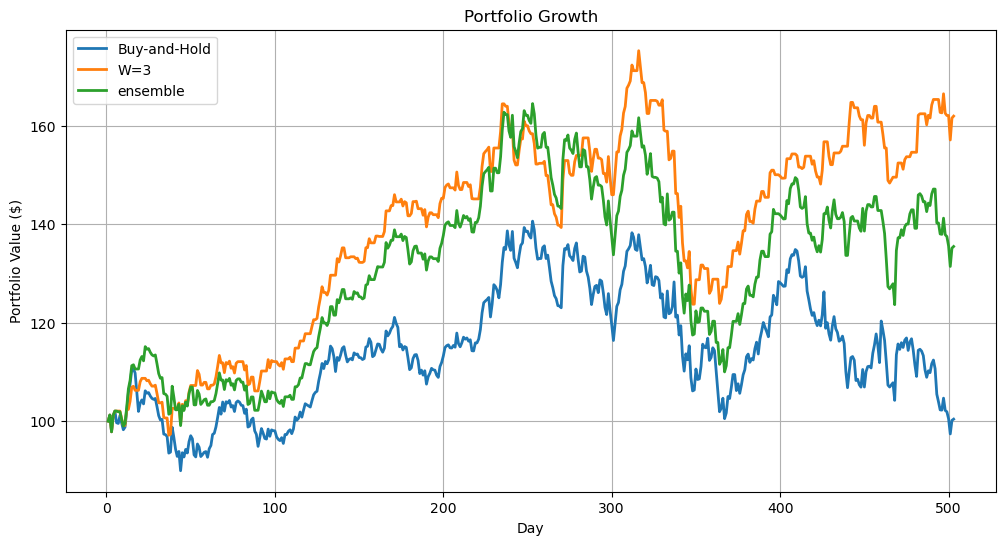

In [110]:
initial_portfolio_value = 100  

buy_and_hold_shares = initial_portfolio_value / AAPL_df_ensemble['Close'].iloc[0]

portfolio_values_buy_and_hold = [buy_and_hold_shares * close for close in AAPL_df_ensemble['Close']]

dates = AAPL_df_ensemble['Date'].tolist()

plt.figure(figsize=(12, 6))
plt.plot(Day, portfolio_values_buy_and_hold, label='Buy-and-Hold', linewidth=2)
plt.plot(Day, portfolio_values_w3, label='W=3', linewidth=2)
plt.plot(Day, portfolio_values_ensemble, label='ensemble', linewidth=2)
plt.xlabel('Day')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Growth')
plt.legend()
plt.grid(True)

plt.show()
